# Exercise session, week 12

**Course**: [_Systèmes dynamiques en biologie_](https://moodle.epfl.ch/course/info.php?id=14291) (BIO-341)

**Professor**: _Felix Naef_ , _Julian Shillcock_

SSV, BA5, 2024

In [1]:
# import important libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import odeint

# set_matplotlib_formats("png", "pdf")
matplotlib.rc("image", cmap="RdBu")
import matplotlib.animation as animation
from random import random
from time import time

## A. Organization of the circadian oscillator network in the brain
  
In mammals, circadian timing is regulated by the master clock, which is composed of about 20000 neurons located in the suprachiasmatic nucleus (SCN) in the hypothalamus. The neurons in the SCN are synchronized with each other, in part, by neurotransmitters that are secreted by the neurons. Here, we are interested in how different neuron connectivities affect collective synchronization and oscillatory behavior. For simplicity, we will consider a theoretical model of the SCN in which coupled oscillators are arranged in a 2-dimensional space (grid). We can construct a symmetric adjacency matrix (coupling matrix) $\mathbf{A}$ where $\mathbf{A_{ij}}=\mathbf{A_{ji}}$ specifies the coupling between oscillator $i$ and oscillator $j$. Here, we consider the simplest case where $\mathbf{A_{ij}}$ is either 0 or 1. This coupling is modulated by a strength $K$. 

For each neuron $i$, $\dot{\theta}_i = f_i + K  \sum_{j=1}^{N}\mathbf{A_{ij}} \sin (\theta_j-\theta_i)$.  

We provide you with two functions: 
- heatmap: plot a $n \times n$ grid ($N := n^2$ being the number of neurons), which represents the SCN. Each cell shows the value contained in the matrix _datagrid_. The values are plotted from bottom left to top right, row by row.
- value_to_size: create the grid on which the oscillators are. This function is called by heatmap.

In [2]:
# create a grid on which the oscillators are

def value_to_size(val, size_min, size_max, size_scale):
    val = abs(val)  # to handle negative  numbers
    val_position = (val - size_min) * 0.99 / (
        size_max - size_min
    ) + 0.01  # position of value in the input range, relative to the length of the input range
    return val_position * size_scale


def heatmap(datagrid, marker, ax):
    x = list(range(datagrid.shape[1]))
    y = list(range(datagrid.shape[0]))

    size_min, size_max = 0, 1
    size_scale = 500

    # dot the scatter + 2 extra invisible points to normalize colors
    scat = ax.scatter(
        x=x * len(y) + [-100, -100],
        y=[v for v in y for p in x] + [-100, -100],
        marker=marker,
        s=[value_to_size(v, size_min, size_max, size_scale) for v in datagrid.flatten()]
        + [1, 1],
        c=[v for v in datagrid.flatten()] + [-1, 1],
        cmap="RdBu",
    )

    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_yticks(y)
    ax.set_yticklabels(y)

    ax.grid(False, "major")
    ax.grid(True, "minor")

    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max(x) + 0.5])
    ax.set_ylim([-0.5, max(y) + 0.5])
    ax.set_facecolor("#F1F1F1")

Below is an example of how to use the functions to plot the phase of each neuron in each cell of the grid: 

(100,)
(10, 10)


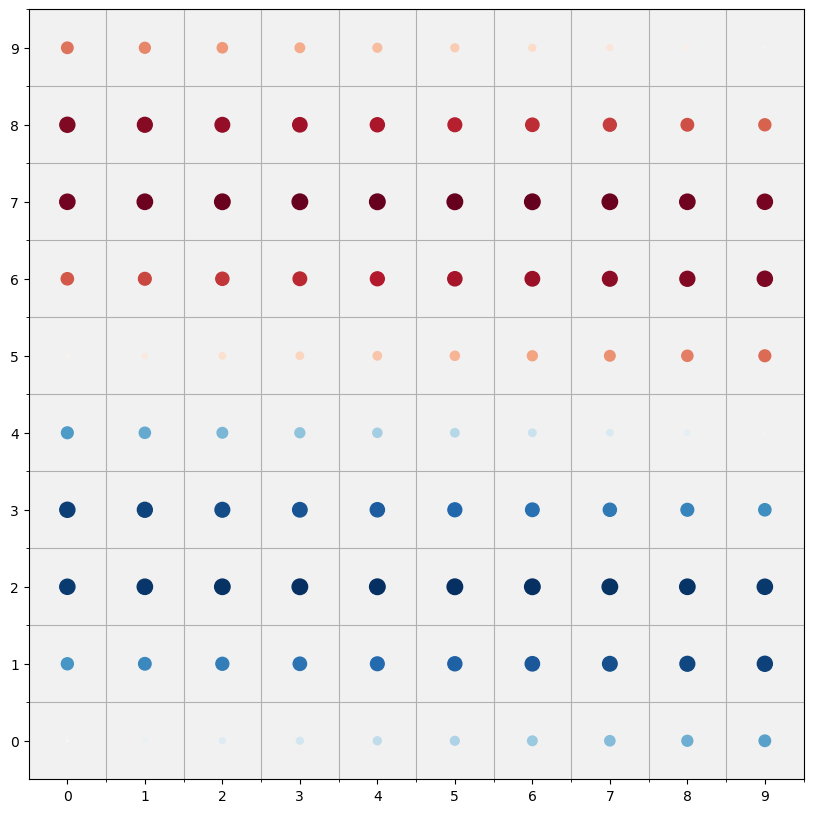

In [3]:
# create 100 cells (10*10 grid)
N = 100
n = int(N**0.5)

# create a vector of increasing phases to check the order of the oscillators on the plotted grid
l_x0 = np.linspace(0, 2 * np.pi, N)
print(l_x0.shape)
# reshape l_x0 to match the grid
X = np.reshape(l_x0, (n, n))
print(X.shape)
# plot the oscillators
datagrid = np.sin(X)
fig, ax = plt.subplots(figsize=(X.shape[0], X.shape[1]))
heatmap(datagrid, marker=".", ax=ax)
plt.show()

#### Question 1: 
Assume that every neuron is connected to its nearest neighbours in the grid: for example, a neuron in position $(i,j)$ will be connected to the neurons at $(i-1,j)$, $(i+1,j)$, $(i, j-1)$ and $(i, j+1)$. Assume also that the neuron is connected to its second nearest neighbours: $(i-1,j-1)$, $(i-1,j+1)$, $(i+1,j-1)$, $(i+1,j+1)$.

Visualize the circadian oscillations of neurons at different times using the provided function heatmap and using subplots.

**Hint** : 
Initialize the parameters of a population of $N$ neurons ($N$~100--1000 cells) with varying intrinsic periods of about 24 hours. For instance, you can modify the period of a neuron $i$ by drawing $f_i$ from a normal distribution with $\mu =2\pi/24$ and $\sigma$ equal to $5\%$ of the mean (you may have to play with $\sigma$ to obtain synchronization). Assign coordinates to each cell in a 2D grid, e.g. with x and y coordinates in a rectangle (the real SCN has an ‘egg’ shape). Choose $K = 0.03$. 

In [ ]:
def model(
    l_theta, t, l_f, K, A
):  # l_theta: list of initial phase of the N neurons, t = time (needed for odeint),
    # l_f: intrinsic frequencies of the neurons, K: coupling strength, A: interaction matrix

    # compute interaction matrix
    

In [ ]:
# Defining some interaction matrices


# create a matrix of random connections,
# each neuron is connected to another with probability p
def A_alltoall(N, p=1):
    ### write function


def A_NN(N):
    # Nearest Neighbours

    A = np.zeros((N, N))
    n = int(np.sqrt(N))
    neuron_index = np.arange(N)
    NI = np.reshape(neuron_index, (n, n))

    for i in range(n):  # row number
        for j in range(n):  # column number
            if i < n - 1:
                A[NI[i, j]][NI[i + 1, j]] = 1

            if i > 0:
                A[NI[i, j]][NI[i - 1, j]] = 1

            if j < n - 1:
                A[NI[i, j]][NI[i, j + 1]] = 1

            if j > 0:
                A[NI[i, j]][NI[i, j - 1]] = 1

            A[NI[i, j]][NI[i, j]] = 1

    return A


def A_2NN(N):
    # First and second Nearest Neighbours

    A = A_NN(N)
    n = int(np.sqrt(N))
    neuron_index = np.arange(N)
    NI = np.reshape(neuron_index, (n, n))

    for i in range(n):  # row number
        for j in range(n):  # column number
            # second nearest neightbours
            if i < n - 1 and j < n - 1:
                A[NI[i, j]][NI[i + 1, j + 1]] = 1

            if i < n - 1 and j > 0:
                A[NI[i, j]][NI[i + 1, j - 1]] = 1
            if i > 0 and j < n - 1:
                A[NI[i, j]][NI[i - 1, j + 1]] = 1

            if i > 0 and j > 0:
                A[NI[i, j]][NI[i - 1, j - 1]] = 1

            A[NI[i, j]][NI[i, j]] = 1

    return A


# plot ieteraction matrices with plt.imshow() to see how they differ

In [ ]:
# define a function for that takes the mean of exp(j*theta) for all theta in l_theta
def order(l_angles):
    ###

In [ ]:
# create a vector of intrinsic frequencies
mu = 2 * np.pi / 24
sigma = 0.1 * mu
l_f = np.random.randn(N) * sigma + mu

# define time domain
dt = 0.25  # fixed
nsteps = 1000
T = dt * nsteps

tspan = np.linspace(0, T, nsteps)

# define coupling strength
K = 0.03


# define interaction matrix
A = A_2NN(N)


# # simulate cells, crucial step!
X = odeint(model, l_x0, tspan, args=(l_f, K, A))
print(X.shape)
# reshape X to match the interaction grid
X = np.reshape(X, (X.shape[0], n, n))

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16))
axs = axs.flatten()

# showing only some of the time steps
i_show = np.arange(0, nsteps, int(nsteps / 20))

# looping over the time steps to plot the oscillators
for ax, i in zip(axs, i_show):
    # in order to visualize the oscillation on the grid, we need to take the sin of the phases
    datagrid = np.sin(X[i, :])
    heatmap(datagrid, marker=".", ax=ax)
    # here it is crucial the part with abs(order(X[i, :]))
    # it takes the avrage of the thetas around the circle and than takes the absolute value
    ax.set_title("Time {0:.2f}, R = {1:.2f}".format(tspan[i], abs(order(X[i, :]))))

plt.show()

**Question 2**

Do the same plots as for Question 1 but for an all-to-all interaction matrix: $A_{ij}=1$ for all $i,j$. Set $K=0.001$.

How does the space-time synchronization dynamics change with respect to the previous case?

In [ ]:
# create a vector of intrinsic frequencies
mu = 2 * np.pi / 24
sigma = 0.1 * mu
l_f = np.random.randn(N) * sigma + mu

# define time domain
dt = 0.25  # fixed
nsteps = 1000
T = dt * nsteps

tspan = np.linspace(0, T, nsteps)

# define coupling strength
K = 0.001  #


# define interaction matrix
A = A_alltoall(N)

# simulate cells, these is the vector of phases
X = odeint(model, l_x0, tspan, args=(l_f, K, A))

# reshape X to match the interaction grid
X = np.reshape(X, (X.shape[0], n, n))


In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16))
axs = axs.flatten()

i_show = np.arange(0, nsteps, int(nsteps / 20))

for ax, i in zip(axs, i_show):
    # X represents the phases therefore we need to take the sin of it to plot the oscillators
    datagrid = np.sin(X[i, :])
    heatmap(datagrid, marker=".", ax=ax)
    ax.set_title("Time {0:.2f}, R = {1:.2f}".format(tspan[i], abs(order(X[i, :]))))

plt.show()

#### Question 3:  
Generate a random adjacency matrix where $\mathbf{A}_{ij} = 1$ with a probability $p$, where a ‘success’ will generate $\mathbf{A}=\mathbf{1}$ and $\mathbf{A}=\mathbf{0}$ otherwise.
Which probability is needed (approximately, based on the final state) in order to retain synchronized oscillations given your chosen $\sigma$? 

Use again the function _heatmap_. You should plot only the final state for the different p (both bigger and smaller than the critical probability). 

In [ ]:
start = time()

fig, axs = plt.subplots(4, 5, figsize=(20, 16))
axs = axs.flatten()

P = np.linspace(0, 1, 20)
R = np.zeros(shape=(len(P),))
M = 5

for k, p in enumerate(P):
    # use function that creates matrix of random connections
    # A = A_alltoall(N, p)

    K = 0.001

    # simulate neurons
    X = odeint(model, l_x0, tspan, args=(l_f, K, A))
    X = np.reshape(X, (X.shape[0], int(N**0.5), int(N**0.5)))
    datagrid = np.sin(X[-1, :])
    heatmap(datagrid, marker=".", ax=axs[k])

    r = 0
    for l in np.arange(M):
        r += abs(order(X[-(l + 1), :]))
    R[k] = r / M

    axs[k].set_title("p = {0:.2f}, R = {1:.2f}".format(p, R[k]))

end = time()

print("It took ", end - start, " s.")

#### Question 4:  
With $R$ defined as $R=\frac 1 N \sum_j e^{i\theta_j}$, plot the function $R(p)$ and find the critical probability (the probability of the neuron connections when the system becomes syncronized $\sim R\ge 0.5$). Use at least $10$ different values of $p$ for the plot.

**Hint:** to have a "reliable" estimate of $R$, you could average it on some time (at the end of the simulation).

Which is the critical value of $p$?

$R\geq0.5$ is attained for $p\sim 0.5$.

## B. The Kuramoto branches (Optional)

In [14]:
# import important libraries
from scipy.integrate import odeint, quad
# from IPython.display import set_matplotlib_formats
from matplotlib.markers import MarkerStyle
# set_matplotlib_formats("png", "pdf")

Take the self consistent equation:  
  
$r=\langle\cos (\theta)\rangle_s=r K \int_{-\pi / 2}^{\pi / 2} \cos ^2(\theta) g(K r \sin (\theta)) d \theta$  
  
And use it to plot the 2 branches stemming from the Kuramoto's model in the plane (K,r)

*hint*:

the curve is the made by the set of points in plane (K,r) such that:
  
  $0 =r K \int_{-\pi / 2}^{\pi / 2} \cos ^2(\theta) g(K r \sin (\theta)) d \theta - r = K \int_{-\pi / 2}^{\pi / 2} \cos ^2(\theta) g(K r \sin (\theta)) d \theta - 1 $  

Define function that finds $ F(K,r) = K \int_{-\pi / 2}^{\pi / 2} \cos ^2(\theta) g(K r \sin (\theta)) d \theta - 1 $  
than find F(K, r) for a mash grid of points, and finally select the curve such that F(K,r)=0

In [ ]:
sigma=1
Kc = 2 / np.pi * np.sqrt(2 * np.pi) * 1


# write the function here , use quad to integrate
def F(K, r):
    

In [ ]:
# once define the function F(K,r) we can plot it
# we use the countour function have the F=0 slice

contr = np.arange(0, 1.1, 0.01)
contK = np.arange(0, 5, 0.1)
KK, rr = np.meshgrid(contK, contr)
V = np.array([0.0])
Z = np.zeros_like(KK)

for i in range(KK.shape[0]):
    for j in range(KK.shape[1]):
        Z[i, j] = F(KK[i, j], rr[i, j])
plt.contour(KK, rr, Z, V, colors="purple")
plt.plot([0, 5], [0, 0], color="purple")
plt.scatter(Kc, 0)
plt.xlabel("K")
plt.ylabel("r")
plt.show()